# Linear Regression

In [ ]:
!pip install scikit-learn==0.24.1

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Can we teach a computer addition?

In [2]:
X1 = np.arange(1, 1000)
X2 = np.arange(1, 1000)
y = X1 + X2

data = pandas.DataFrame(zip(X1, X2, y), columns=['X1', 'X2', 'y'])
print(data.head())

# X = data[['X1', 'X2']].values.reshape(-1, 1)
X = data[['X1', 'X2']].values
y = data['y'].values

   X1  X2   y
0   1   1   2
1   2   2   4
2   3   3   6
3   4   4   8
4   5   5  10


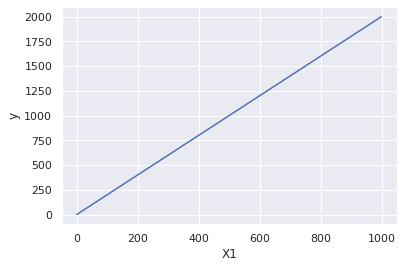

In [3]:
sns.lineplot(x='X1', y='y', data=data)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [6]:
reg.coef_

array([1., 1.])

## _How we can evaluate our model? Is accuracy suitable?_

In [8]:
from sklearn.metrics import mean_absolute_error

predictions = reg.predict(X_test)
# mae = np.abs(predictions - y_test).mean()

print(f'MAE Score: {mean_absolute_error(predictions, y_test)}')

MAE Score: 1.4596768238561708e-13


In [9]:
examples = [[5,7], [2,2], [127, 20]]
reg.predict(examples)

array([ 12.,   4., 147.])

## _What if we train linear regression model on non-linear function?_

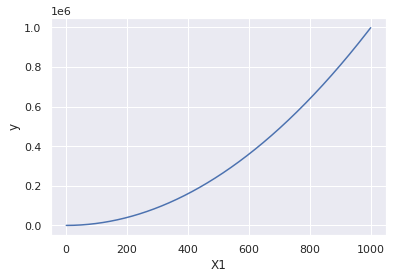

In [10]:
non_linear_X1 = np.arange(1, 1000)
non_linear_X2 = np.arange(1, 1000)
non_linear_y = non_linear_X1 * non_linear_X2

non_linear_data = pandas.DataFrame(zip(non_linear_X1, non_linear_X2, non_linear_y), columns=['X1', 'X2', 'y'])
non_linear_X = non_linear_data[['X1', 'X2']].values
non_linear_y = non_linear_data['y'].values

(non_linear_X_train, non_linear_X_test, 
 non_linear_y_train, non_linear_y_test) = train_test_split(non_linear_X, non_linear_y, test_size=0.2)

sns.lineplot(x='X1', y='y', data=non_linear_data)

In [11]:
non_linear_reg = LinearRegression()
non_linear_reg.fit(non_linear_X_train, non_linear_y_train)

non_linear_predictions = non_linear_reg.predict(X_test)
print(f'MAE Score of non_linear_regression model: {mean_absolute_error(non_linear_predictions, non_linear_y_test)}')

MAE Score of non_linear_regression model: 310764.0961704414


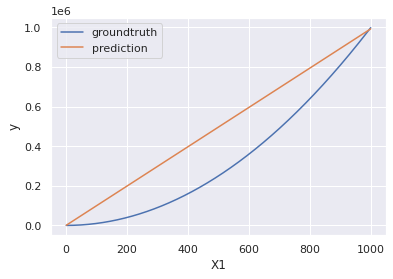

In [12]:
temp_X1 = np.arange(1, 1000)
temp_X2 = np.arange(1, 1000)
temp_y = non_linear_reg.coef_[0] * temp_X1 + non_linear_reg.coef_[1] * temp_X2

sns.lineplot(x='X1', y='y', data=non_linear_data, legend='brief', label='groundtruth')
sns.lineplot(x=temp_X1, y=temp_y, legend='brief', label='prediction')

# Boston House Prices

In [13]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

In [14]:
data = boston_dataset.data
target = boston_dataset.target
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [15]:
data = pandas.DataFrame(data, columns=boston_dataset.feature_names)
data['PRICES'] = boston_dataset.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICES
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICES
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'PRICES')

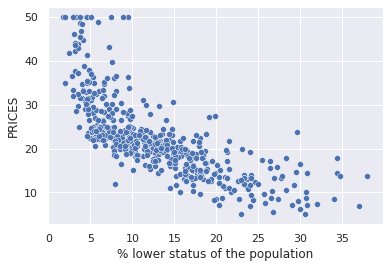

In [17]:
sns.scatterplot(data['LSTAT'], data['PRICES'])
plt.xlabel('% lower status of the population')
plt.ylabel('PRICES')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


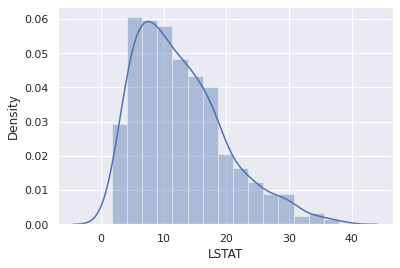

In [18]:
sns.distplot(data['LSTAT'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Prices')

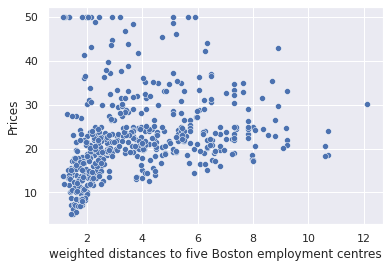

In [19]:
sns.scatterplot(data['DIS'], data['PRICES'])
plt.xlabel('weighted distances to five Boston employment centres')
plt.ylabel('Prices')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Prices')

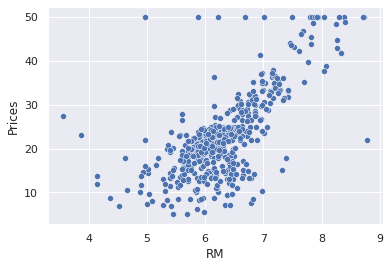

In [20]:
sns.scatterplot(data['RM'], data['PRICES'])
plt.ylabel('Prices')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Prices')

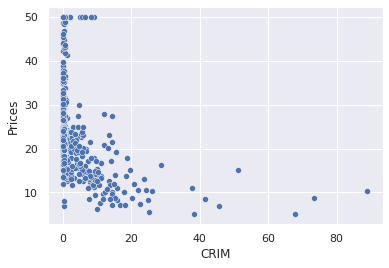

In [21]:
sns.scatterplot(data['CRIM'], data['PRICES'])
plt.ylabel('Prices')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


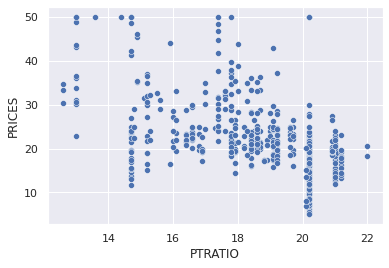

In [22]:
sns.scatterplot(data['PTRATIO'], data['PRICES'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'pupil-teacher ratio by town')

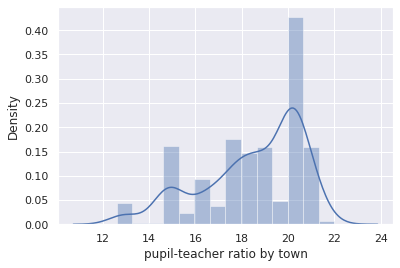

In [23]:
sns.distplot(data['PTRATIO'])
plt.xlabel('pupil-teacher ratio by town')

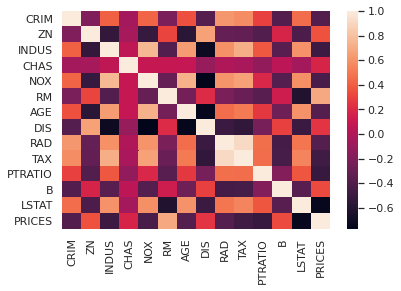

In [24]:
sns.heatmap(data.corr())

## Select the features

In [25]:
# Selecting the features

features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
            'TAX', 'PTRATIO', 'B', 'LSTAT']
label = ['PRICES']
X = data[features].values
y = data[label].values

## Apply normalization

In [26]:
# Normalization

from sklearn.preprocessing import normalize

# X_norm = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_norm = X / np.sqrt((X*X).sum(axis=1))[:, np.newaxis] # L2 Norm

# X_norm = normalize(X, norm='max')
X_norm = normalize(X, norm='l2')

## Regression Model

In [27]:
from sklearn.model_selection import train_test_split

# 80% Train, 10% Validation, %10 Test
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42) 
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in validation dataset: {len(X_valid)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 506
Total # of sample in train dataset: 404
Total # of sample in validation dataset: 51
Total # of sample in test dataset: 51


In [28]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [29]:
from sklearn.metrics import mean_absolute_error

predictions = reg.predict(X_valid)
print(f'MAE Score: {mean_absolute_error(predictions, y_valid)}')

MAE Score: 2.944305201167289


In [30]:
reg = LinearRegression(normalize=True)
reg.fit(X_train, y_train)

predictions = reg.predict(X_valid)
print(f'MAE Score: {mean_absolute_error(predictions, y_valid)}')

MAE Score: 2.9443052011672903


In [31]:
from sklearn.linear_model import PoissonRegressor 

poi_reg = PoissonRegressor()
poi_reg.fit(X_train, y_train.ravel())

predictions = poi_reg.predict(X_valid)
print(f'MAE Score: {mean_absolute_error(predictions, y_valid)}')

MAE Score: 5.040063688806873


In [32]:
poi_reg = PoissonRegressor(max_iter=10000)
poi_reg.fit(X_train, y_train.ravel())

predictions = poi_reg.predict(X_valid)
print(f'MAE Score: {mean_absolute_error(predictions, y_valid)}')

MAE Score: 5.040063688806873


In [33]:
poi_reg = PoissonRegressor(tol=1e-2, max_iter=10000)
poi_reg.fit(X_train, y_train.ravel())

predictions = poi_reg.predict(X_valid)
print(f'MAE Score: {mean_absolute_error(predictions, y_valid)}')

MAE Score: 5.03978853336829


In [34]:
poi_reg = PoissonRegressor(tol=1e-6, max_iter=10000)
poi_reg.fit(X_train, y_train.ravel())

predictions = poi_reg.predict(X_valid)
print(f'MAE Score: {mean_absolute_error(predictions, y_valid)}')

MAE Score: 5.040058083742699


## Cross Validation

To be more robust in hyper-parameter tuning

In [35]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error

scoring = {'mae': make_scorer(mean_absolute_error)}

model = LinearRegression()
scores = cross_validate(model, X_train, y_train, cv=10, scoring=scoring)

print(f"Average cross validation MAE score: {scores['test_mae'].mean()}")

Average cross validation MAE score: 3.337594385710812


In [36]:
model = LinearRegression(normalize=True)
scores = cross_validate(model, X_train, y_train, cv=10, scoring=scoring)

print(f"Average cross validation MAE score: {scores['test_mae'].mean()}")

Average cross validation MAE score: 3.3375943857108155


In [37]:
model = PoissonRegressor(max_iter=10000)
scores = cross_validate(model, X_train, y_train.ravel(), cv=10, scoring=scoring)

print(f"Average cross validation MAE score: {scores['test_mae'].mean()}")

Average cross validation MAE score: 6.034347333249074


In [38]:
model = PoissonRegressor(tol=1e-3, max_iter=10000)
scores = cross_validate(model, X_train, y_train.ravel(), cv=10, scoring=scoring)

print(f"Average cross validation MAE score: {scores['test_mae'].mean()}")

Average cross validation MAE score: 6.034326806244402


## Evaluating model on test dataset

In [39]:
# comment
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print(f'Test (Final) MAE Score: {mean_absolute_error(predictions, y_test)}')

Test (Final) MAE Score: 3.1746345618819154


In [40]:
model = PoissonRegressor(tol=1e-3, max_iter=10000)
model.fit(X_train, y_train.ravel())

predictions = model.predict(X_test)
print(f'Test (Final) MAE Score: {mean_absolute_error(predictions, y_test)}')

Test (Final) MAE Score: 5.477422360991311
